In [ ]:
!pip install torch torchvision matplotlib numpy



In [ ]:
import numpy as np
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import Dataset, DataLoader
import matplotlib.pyplot as plt


In [ ]:
class PixelDataset(Dataset):
    def __init__(self, num_samples):
        self.num_samples = num_samples
        self.size = 50

    def __len__(self):
        return self.num_samples

    def __getitem__(self, idx):
        image = np.zeros((50, 50), dtype=np.float32)

        x = np.random.randint(0, 50)
        y = np.random.randint(0, 50)

        image[x, y] = 1.0  # bright pixel

        target = np.array([x/49.0, y/49.0], dtype=np.float32)

        image = np.expand_dims(image, axis=0)

        return torch.tensor(image), torch.tensor(target)


In [ ]:
train_dataset = PixelDataset(5000)
train_loader = DataLoader(train_dataset, batch_size=32, shuffle=True)


In [ ]:
class CNNRegressor(nn.Module):
    def __init__(self):
        super(CNNRegressor, self).__init__()

        self.conv = nn.Sequential(
            nn.Conv2d(1, 16, 3),
            nn.ReLU(),
            nn.MaxPool2d(2),

            nn.Conv2d(16, 32, 3),
            nn.ReLU(),
            nn.MaxPool2d(2)
        )

        self.fc = nn.Sequential(
            nn.Linear(32 * 11 * 11, 64),
            nn.ReLU(),
            nn.Linear(64, 2)
        )

    def forward(self, x):
        x = self.conv(x)
        x = x.view(x.size(0), -1)
        x = self.fc(x)
        return x


In [ ]:
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

model = CNNRegressor().to(device)

criterion = nn.MSELoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)


In [ ]:
epochs = 50
losses = []

for epoch in range(epochs):
    model.train()
    running_loss = 0

    for images, targets in train_loader:
        images = images.to(device)
        targets = targets.to(device)

        optimizer.zero_grad()
        outputs = model(images)

        loss = criterion(outputs, targets)
        loss.backward()
        optimizer.step()

        running_loss += loss.item()

    epoch_loss = running_loss / len(train_loader)
    losses.append(epoch_loss)

    print(f"Epoch {epoch+1}, Loss: {epoch_loss:.6f}")


Epoch 1, Loss: 0.039897
Epoch 2, Loss: 0.004299
Epoch 3, Loss: 0.001881
Epoch 4, Loss: 0.001072
Epoch 5, Loss: 0.000707
Epoch 6, Loss: 0.000502
Epoch 7, Loss: 0.000421
Epoch 8, Loss: 0.000382
Epoch 9, Loss: 0.000377
Epoch 10, Loss: 0.000277
Epoch 11, Loss: 0.000277
Epoch 12, Loss: 0.000290
Epoch 13, Loss: 0.000277
Epoch 14, Loss: 0.000174
Epoch 15, Loss: 0.000213
Epoch 16, Loss: 0.000217
Epoch 17, Loss: 0.000168
Epoch 18, Loss: 0.000151
Epoch 19, Loss: 0.000290
Epoch 20, Loss: 0.000124
Epoch 21, Loss: 0.000116
Epoch 22, Loss: 0.000120
Epoch 23, Loss: 0.000119
Epoch 24, Loss: 0.000113
Epoch 25, Loss: 0.000146
Epoch 26, Loss: 0.000089
Epoch 27, Loss: 0.000097
Epoch 28, Loss: 0.000120
Epoch 29, Loss: 0.000115
Epoch 30, Loss: 0.000103
Epoch 31, Loss: 0.000079
Epoch 32, Loss: 0.000195
Epoch 33, Loss: 0.000194
Epoch 34, Loss: 0.000112
Epoch 35, Loss: 0.000052
Epoch 36, Loss: 0.000103
Epoch 37, Loss: 0.000051
Epoch 38, Loss: 0.000047
Epoch 39, Loss: 0.000053
Epoch 40, Loss: 0.000056
Epoch 41,

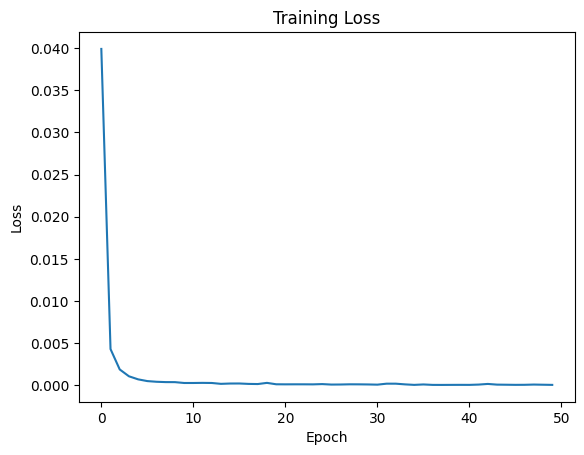

In [ ]:
plt.plot(losses)
plt.title("Training Loss")
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.show()


In [ ]:
model.eval()

test_img, test_target = train_dataset[0]

with torch.no_grad():
    prediction = model(test_img.unsqueeze(0).to(device))
    

pred = prediction.cpu().numpy()[0]

print("True:", test_target.numpy() * 49)
print("Predicted:", pred * 49)


True: [41. 18.]
Predicted: [40.32241  17.952124]


In [ ]:
import math

true_x, true_y = 41, 18
pred_x, pred_y = 40.32241, 17.952124

distance = math.sqrt((true_x - pred_x)**2 + (true_y - pred_y)**2)

print("Pixel Error Distance:", distance)


Pixel Error Distance: 0.6792792647181296
